<a href="https://colab.research.google.com/github/KhanShaheb34/Bangla-Paraphrase-Identification/blob/master/models/Word_Embedding_%2B_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! gdown --id 11xhgSz6-NLohgyvxdPSXeBuaBy_l0ygS
! tar -xf bn_w2v_model_text.tar.gz

Downloading...
From: https://drive.google.com/uc?id=11xhgSz6-NLohgyvxdPSXeBuaBy_l0ygS
To: /content/bn_w2v_model_text.tar.gz
566MB [00:04, 122MB/s]


In [3]:
! gdown --id 1QKGpjiFbrmSyWEMp7noUu3-mEIadblKO
! unzip Dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1QKGpjiFbrmSyWEMp7noUu3-mEIadblKO
To: /content/Dataset.zip
100% 363k/363k [00:00<00:00, 24.1MB/s]
Archive:  Dataset.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: val.csv                 


In [4]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [5]:
model = KeyedVectors.load_word2vec_format('/content/model/bn_w2v_model.text', binary=False)
words = model.most_similar(positive=['প্রধানমন্ত্রী'], negative=[], topn=10)

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('val.csv')

In [7]:
def remove_nnp(sentence):
  return re.sub(r'[^ঀ-ৣ ]', '', sentence).strip()

def get_word_vec(sentence):
  temp_vec = []

  for word in sentence.split():
    try:
      word_vec = model.get_vector(word)
      temp_vec.append(word_vec)
    except:
      pass
  
  return temp_vec

In [18]:
def get_x_y(df):
  cosine_sims = []
  labels = []

  sentence1 = [remove_nnp(data) for data in df.sentence1]
  sentence2 = [remove_nnp(data) for data in df.sentence2]

  for sent1, sent2, label in zip(sentence1, sentence2, df.label):
    temp_vec1 = get_word_vec(sent1)
    temp_vec2 = get_word_vec(sent2)

    try:
      doc_vec1 = np.array(temp_vec1).mean(0)
      doc_vec2 = np.array(temp_vec2).mean(0)

      cosine_sim = cosine_similarity([doc_vec1], [doc_vec2]).min()
      cosine_sims.append(cosine_sim)
      labels.append(label)
    except:
      pass
  print("Correct data count: ", len(labels))

  cosine_sims_df = pd.DataFrame({'cosine_sim': cosine_sims, 'label': labels})
  cosine_sims_df.plot.scatter(x='cosine_sim', y='label')

  X = cosine_sims_df.cosine_sim.to_numpy().reshape(len(labels), 1)
  y = cosine_sims_df.label.to_numpy()

  return X, y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: inval

Correct data count:  5908
Correct data count:  1394
Correct data count:  1480


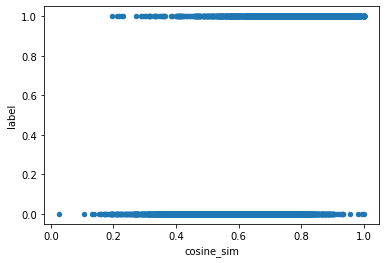

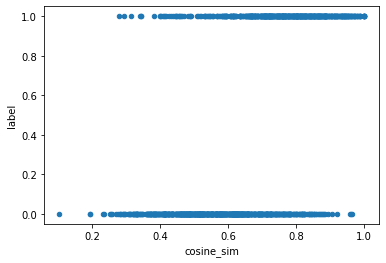

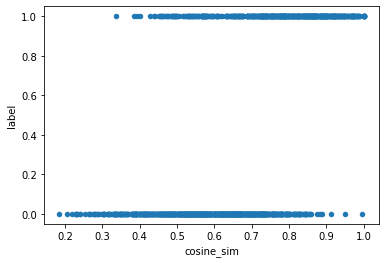

In [19]:
train_x, train_y = get_x_y(train_df)
test_x, test_y = get_x_y(test_df)
val_x, val_y = get_x_y(val_df)

In [22]:
classifier = LogisticRegression().fit(train_x, train_y)
train_score = classifier.score(train_x, train_y)
val_score = classifier.score(val_x, val_y)
test_score = classifier.score(test_x, test_y)

print("Train score:", train_score)
print("Val score:  ", val_score)
print("Test score: ", test_score)

Train score: 0.7718348002708192
Val score:   0.7824324324324324
Test score:  0.7682926829268293


In [23]:
test_preds = classifier.predict(test_x)
acc = accuracy_score(test_y, test_preds)
f1 = f1_score(test_y, test_preds)

print("Test Accuracy:", acc)
print("Test F1 Score:", f1)

Test Accuracy: 0.7682926829268293
Test F1 Score: 0.6920877025738799
